# 기본 세팅

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


# iris 데이터 시각화

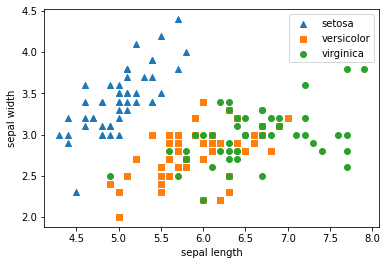

In [2]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
# 말 그대로 마커의 의미
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

# Linear SVM으로 데이터 분류

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


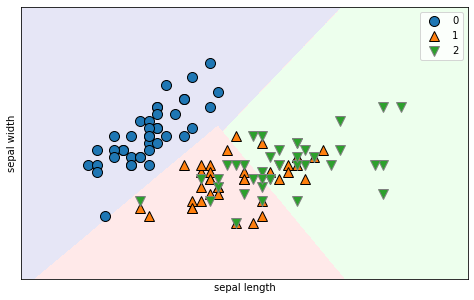

In [3]:
from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC
import mglearn
# 시각화를 위해서 sepal length와 width만 사용한다.
x = iris['data'][:, [0,1]] # column 0과 1만 사용
y = iris['target']

# train 데이터 세트와 test 데이터 세트를 구성한다.
trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.2)

# SVM으로 Train 데이터 세트를 학습한다.
svm = SVC(kernel='linear')
svm.fit(trainX, trainY)

# 정확도를 계산한다.
print('학습용 데이터로 측정한 정확도 = %.2f' % svm.score(trainX, trainY))
print('시험용 데이터로 측정한 정확도 = %.2f' % svm.score(testX, testY))

# 시각화
plt.figure(figsize=(8, 5))
mglearn.plots.plot_2d_classification(svm, trainX, alpha=0.1)
mglearn.discrete_scatter(trainX[:,0], trainX[:,1], trainY)
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

# RBF SVM으로 데이터 분류

학습용 데이터로 측정한 정확도 = 0.79
시험용 데이터로 측정한 정확도 = 0.93


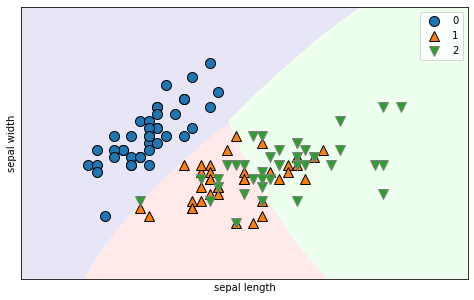

In [4]:
# SVM으로 Train 데이터 세트를 학습한다.
svm = SVC(kernel='rbf')
svm.fit(trainX, trainY)

# 정확도를 계산한다.
print('학습용 데이터로 측정한 정확도 = %.2f' % svm.score(trainX, trainY))
print('시험용 데이터로 측정한 정확도 = %.2f' % svm.score(testX, testY))

# 시각화
plt.figure(figsize=(8, 5))
mglearn.plots.plot_2d_classification(svm, trainX, alpha=0.1)
mglearn.discrete_scatter(trainX[:,0], trainX[:,1], trainY)
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

# 파라미터를 변화하면서 SVM 성능 확인

## 파라미터를 변화하기 위한 준비

In [5]:
kernels = ['linear', 'rbf']
C_parameters = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
Gamma_parameters = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

def plot_svm(kernel, C, gamma) :
    svm = SVC(kernel=kernel, C=C, gamma = gamma)
    svm.fit(trainX, trainY)

    # 정확도를 계산한다.
    print('학습용 데이터로 측정한 정확도 = %.2f' % svm.score(trainX, trainY))
    print('시험용 데이터로 측정한 정확도 = %.2f' % svm.score(testX, testY))

    # 시각화
    plt.figure(figsize=(8, 5))
    # 제목부여
    plt.title("Kernel = {}, C = {}, Gamma = {}".format(kernel, C, gamma))
    mglearn.plots.plot_2d_classification(svm, trainX, alpha=0.1)
    mglearn.discrete_scatter(trainX[:,0], trainX[:,1], trainY)
    plt.legend()
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.show()

## 리스트를 돌아가면서 SVM 수행

지금 당장은 코드를 되게 비효율적으로 짬(FOR 문을 3번 반복)
enumerate를 이용하면 더욱 더 편할 것임.

학습용 데이터로 측정한 정확도 = 0.62
시험용 데이터로 측정한 정확도 = 0.60


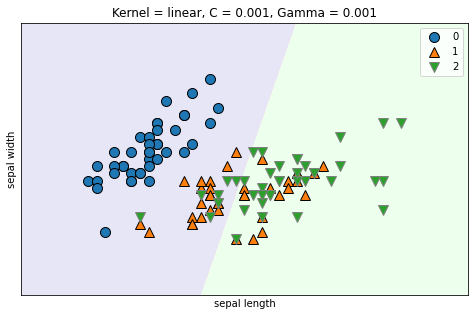

학습용 데이터로 측정한 정확도 = 0.62
시험용 데이터로 측정한 정확도 = 0.60


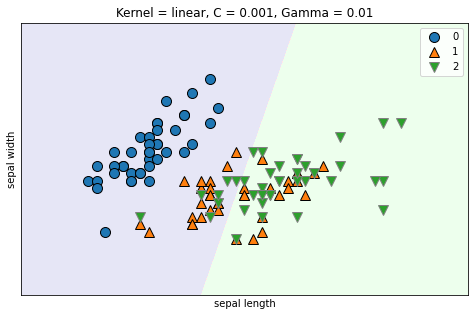

학습용 데이터로 측정한 정확도 = 0.62
시험용 데이터로 측정한 정확도 = 0.60


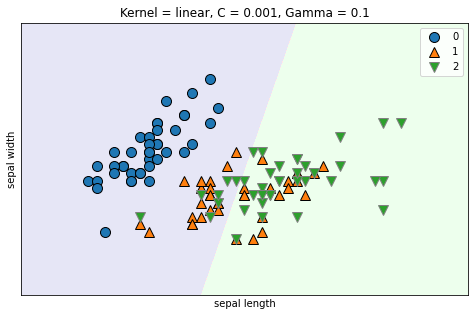

학습용 데이터로 측정한 정확도 = 0.62
시험용 데이터로 측정한 정확도 = 0.60


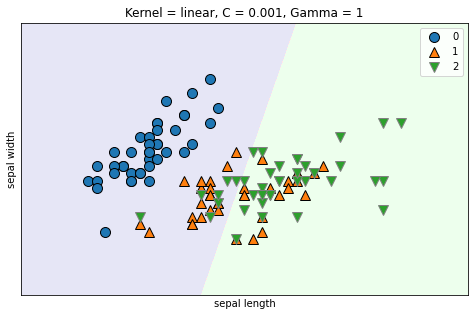

학습용 데이터로 측정한 정확도 = 0.62
시험용 데이터로 측정한 정확도 = 0.60


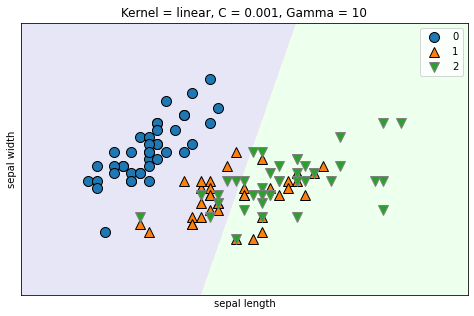

학습용 데이터로 측정한 정확도 = 0.62
시험용 데이터로 측정한 정확도 = 0.60


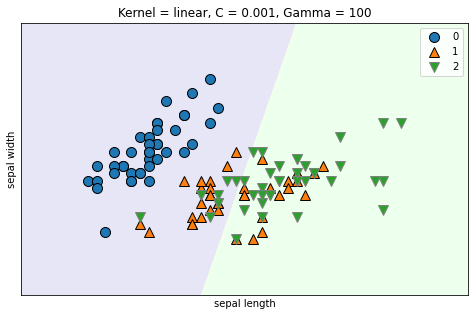

학습용 데이터로 측정한 정확도 = 0.62
시험용 데이터로 측정한 정확도 = 0.60


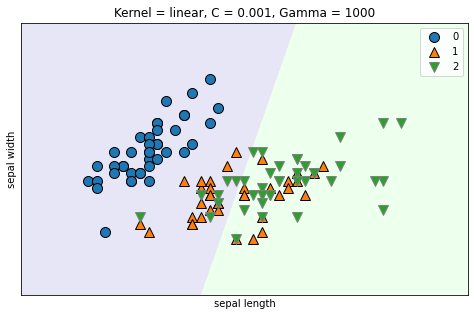

학습용 데이터로 측정한 정확도 = 0.62
시험용 데이터로 측정한 정확도 = 0.60


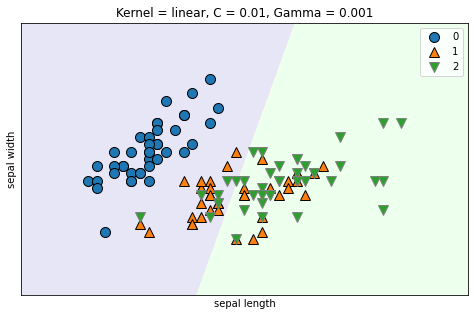

학습용 데이터로 측정한 정확도 = 0.62
시험용 데이터로 측정한 정확도 = 0.60


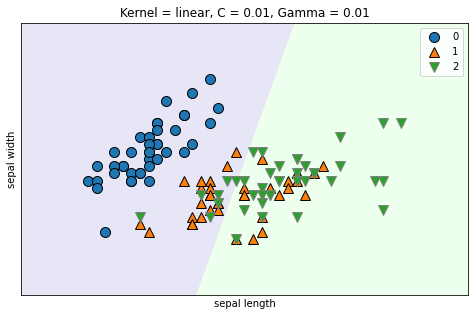

학습용 데이터로 측정한 정확도 = 0.62
시험용 데이터로 측정한 정확도 = 0.60


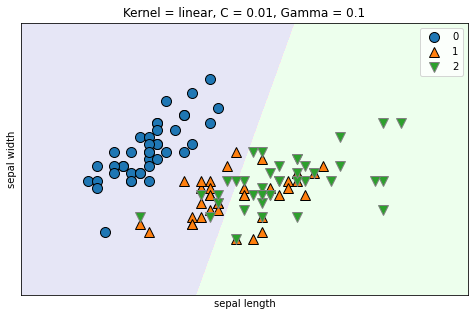

학습용 데이터로 측정한 정확도 = 0.62
시험용 데이터로 측정한 정확도 = 0.60


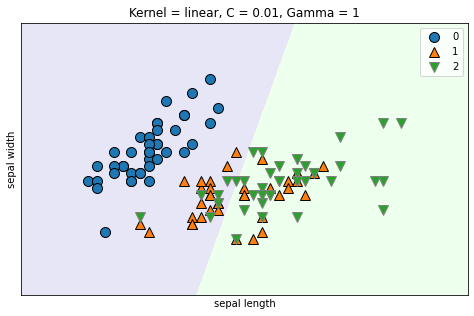

학습용 데이터로 측정한 정확도 = 0.62
시험용 데이터로 측정한 정확도 = 0.60


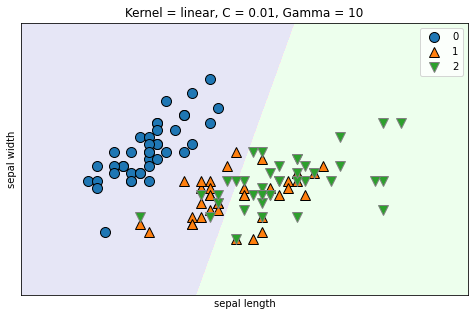

학습용 데이터로 측정한 정확도 = 0.62
시험용 데이터로 측정한 정확도 = 0.60


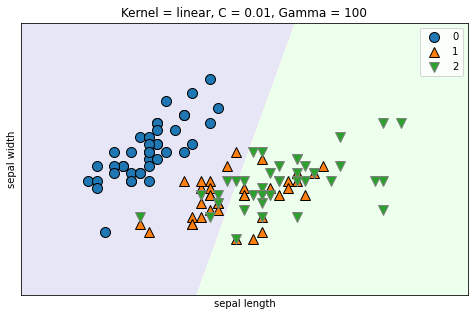

학습용 데이터로 측정한 정확도 = 0.62
시험용 데이터로 측정한 정확도 = 0.60


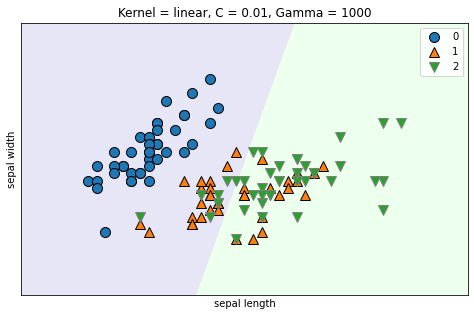

학습용 데이터로 측정한 정확도 = 0.76
시험용 데이터로 측정한 정확도 = 0.93


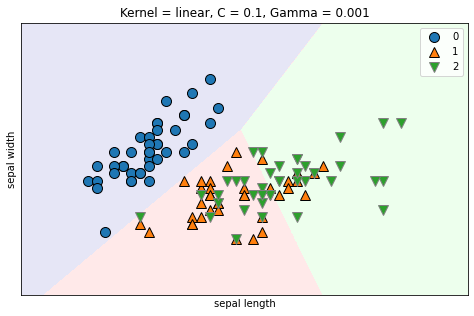

학습용 데이터로 측정한 정확도 = 0.76
시험용 데이터로 측정한 정확도 = 0.93


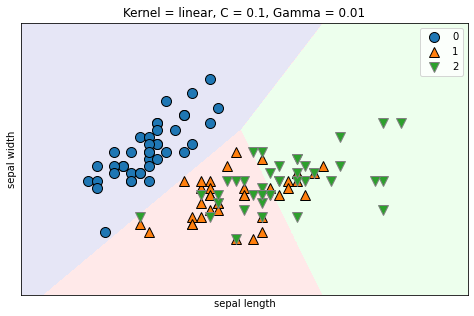

학습용 데이터로 측정한 정확도 = 0.76
시험용 데이터로 측정한 정확도 = 0.93


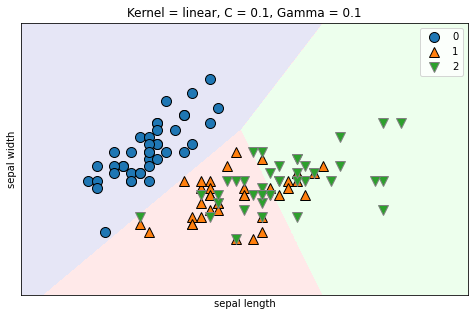

학습용 데이터로 측정한 정확도 = 0.76
시험용 데이터로 측정한 정확도 = 0.93


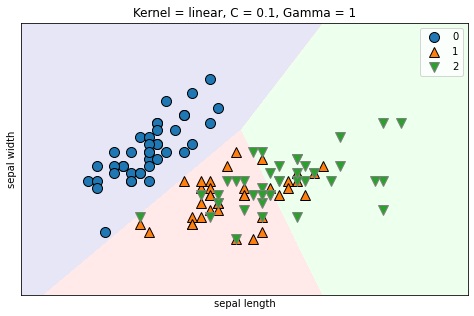

학습용 데이터로 측정한 정확도 = 0.76
시험용 데이터로 측정한 정확도 = 0.93


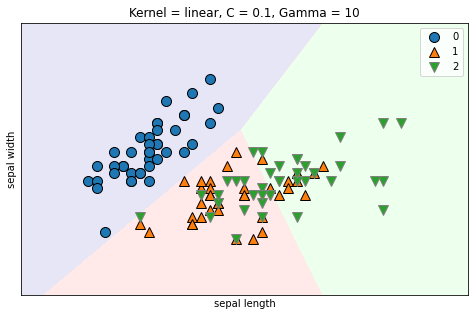

학습용 데이터로 측정한 정확도 = 0.76
시험용 데이터로 측정한 정확도 = 0.93


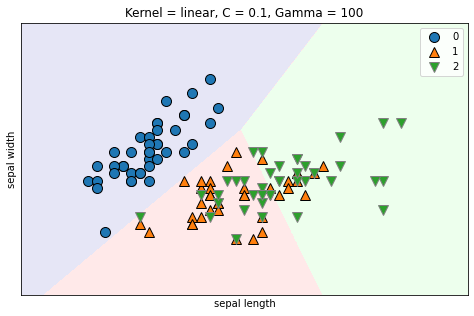

학습용 데이터로 측정한 정확도 = 0.76
시험용 데이터로 측정한 정확도 = 0.93


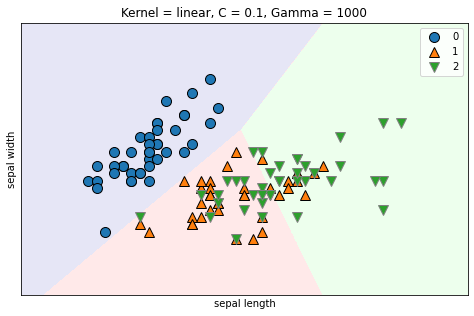

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


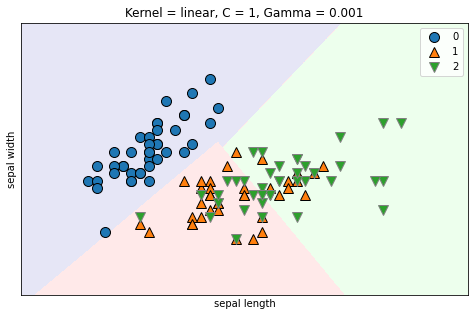

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


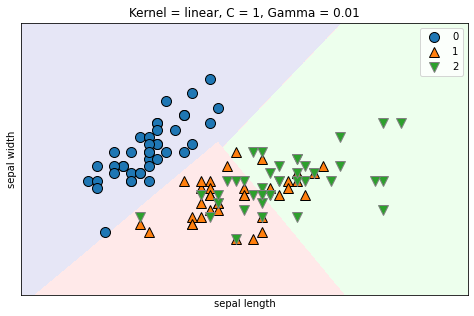

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


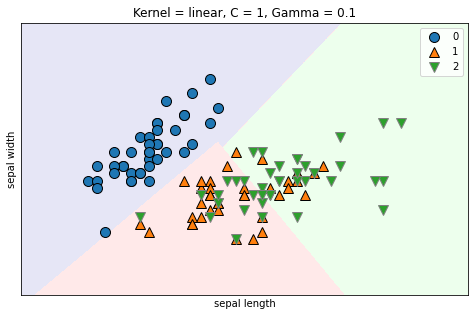

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


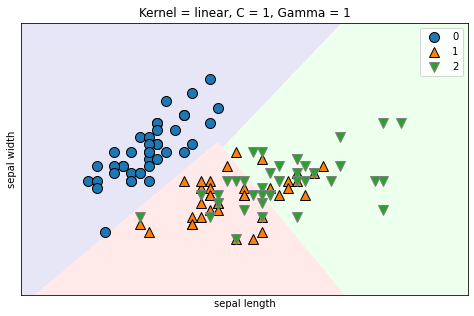

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


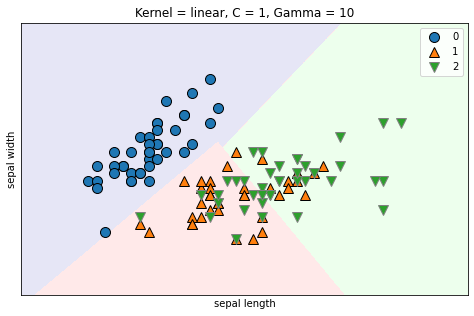

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


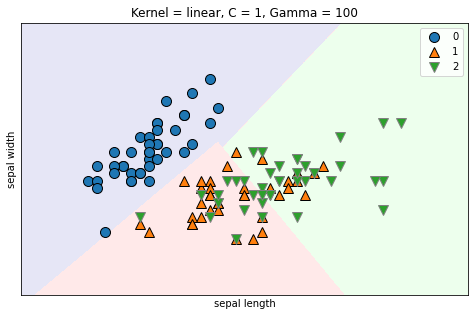

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


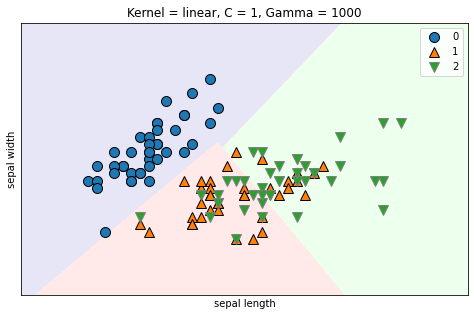

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


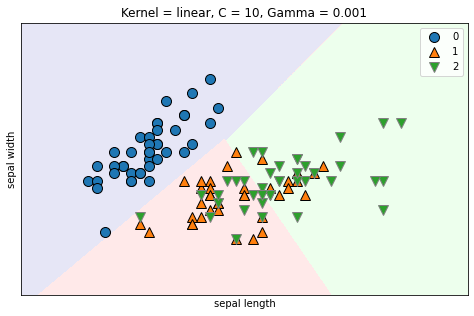

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


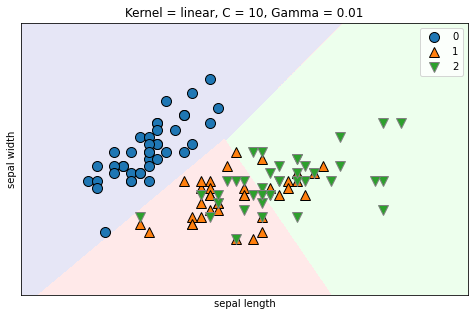

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


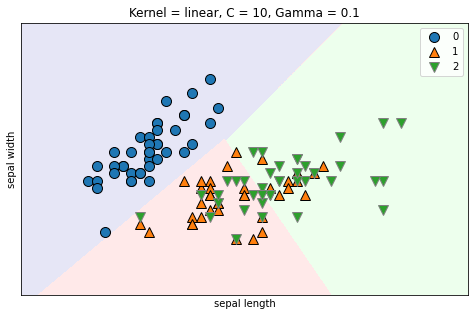

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


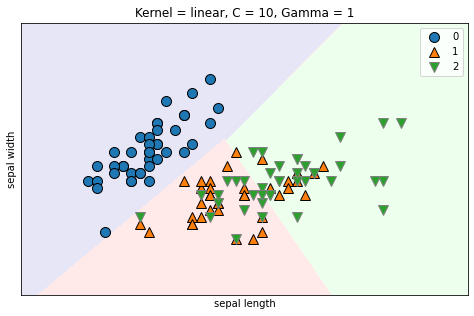

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


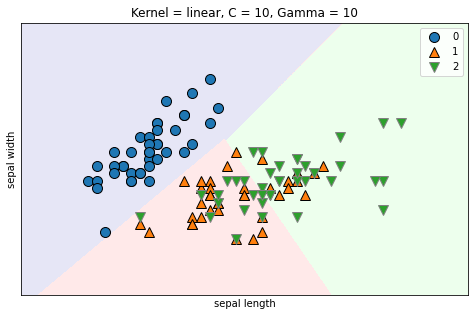

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


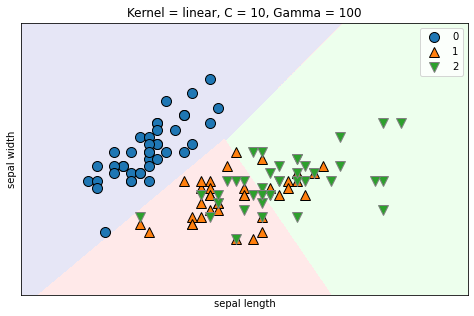

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


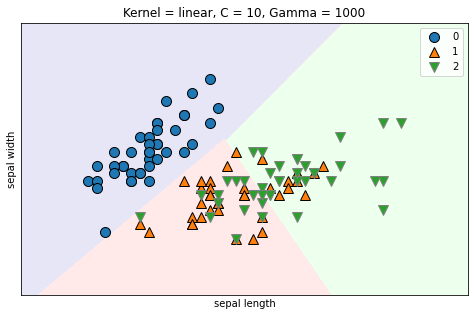

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


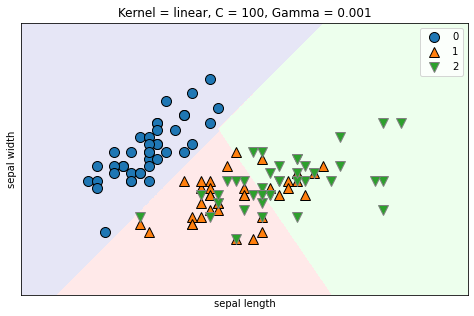

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


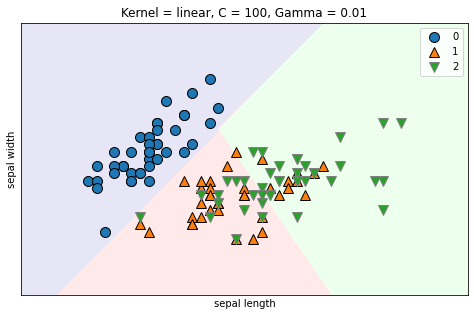

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


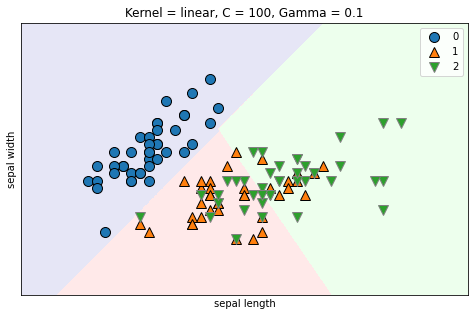

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


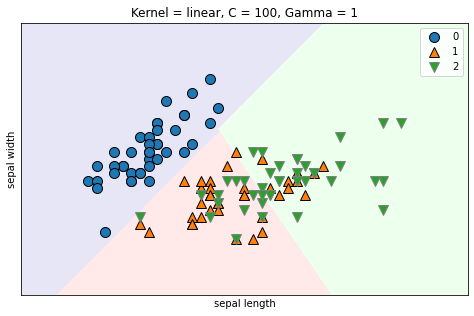

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


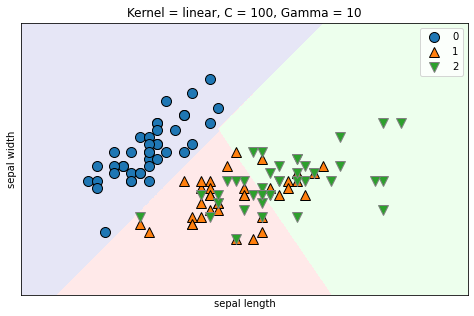

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


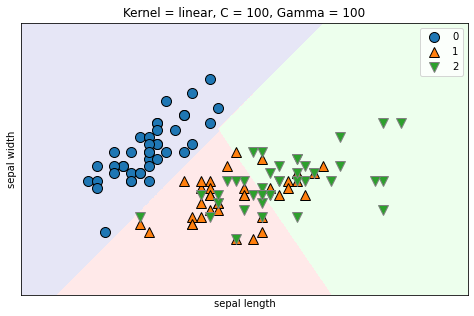

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


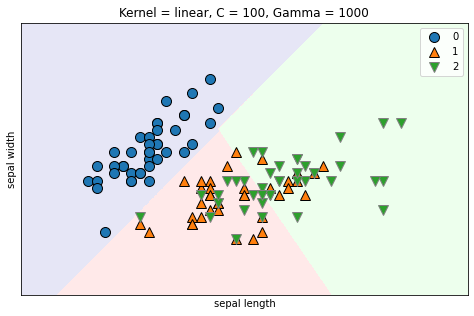

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


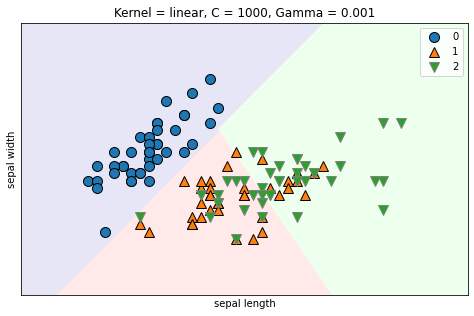

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


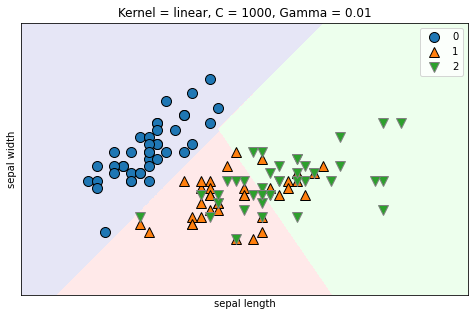

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


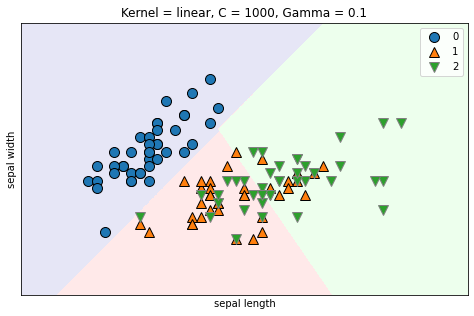

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


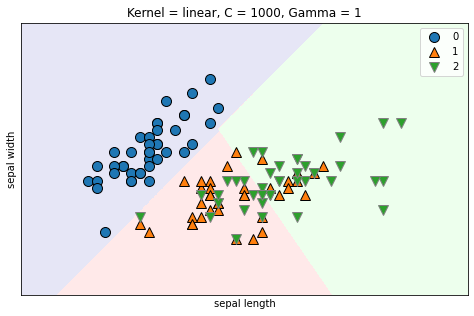

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


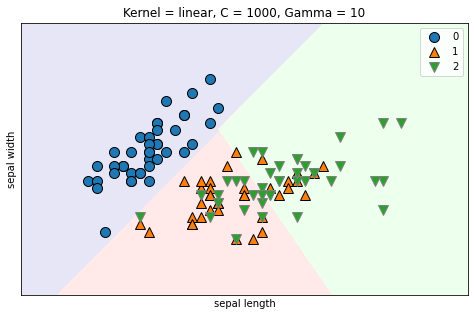

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


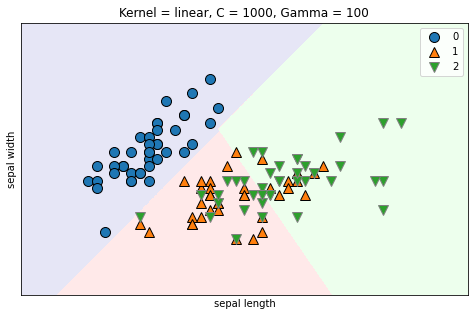

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


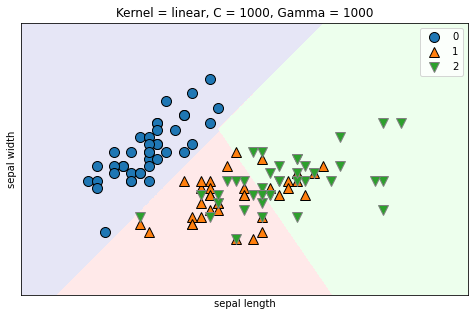

학습용 데이터로 측정한 정확도 = 0.62
시험용 데이터로 측정한 정확도 = 0.60


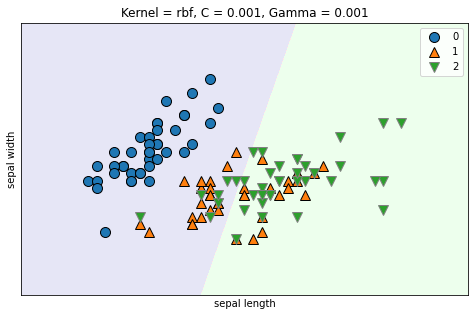

학습용 데이터로 측정한 정확도 = 0.62
시험용 데이터로 측정한 정확도 = 0.60


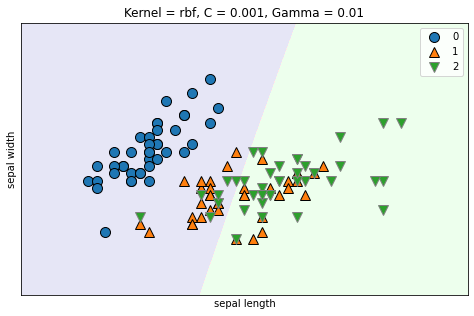

학습용 데이터로 측정한 정확도 = 0.65
시험용 데이터로 측정한 정확도 = 0.60


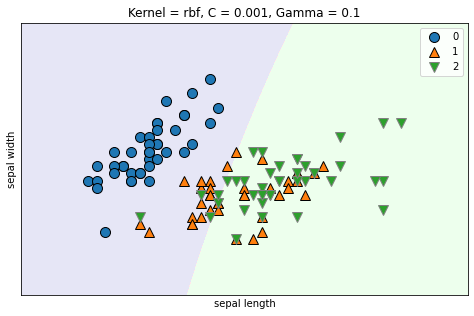

학습용 데이터로 측정한 정확도 = 0.68
시험용 데이터로 측정한 정확도 = 0.60


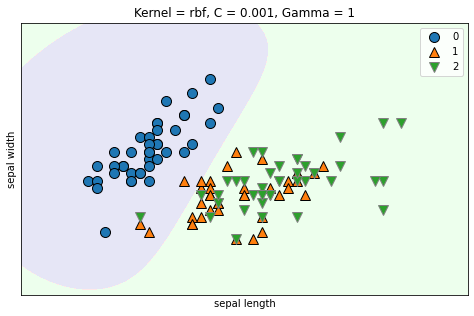

학습용 데이터로 측정한 정확도 = 0.68
시험용 데이터로 측정한 정확도 = 0.60


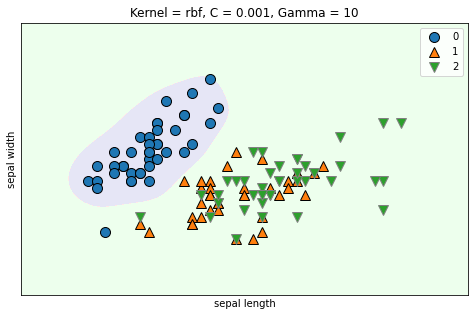

학습용 데이터로 측정한 정확도 = 0.68
시험용 데이터로 측정한 정확도 = 0.57


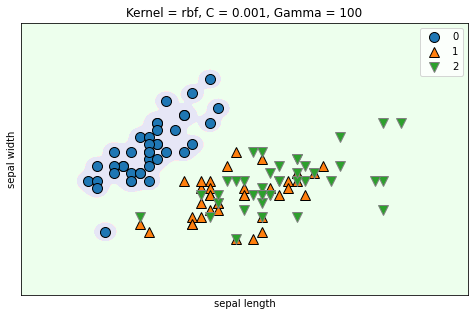

학습용 데이터로 측정한 정확도 = 0.68
시험용 데이터로 측정한 정확도 = 0.57


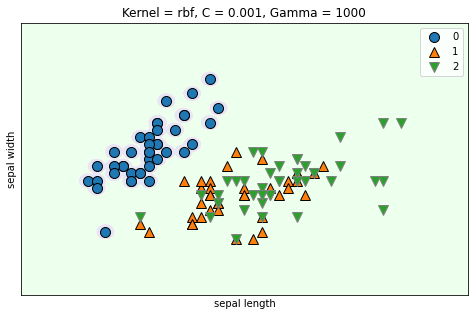

학습용 데이터로 측정한 정확도 = 0.62
시험용 데이터로 측정한 정확도 = 0.60


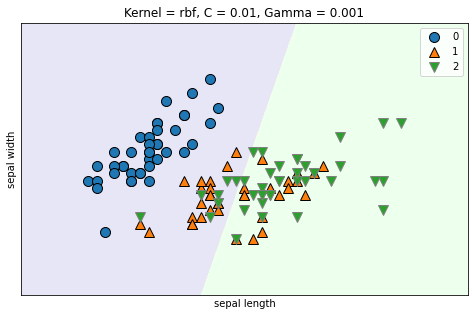

학습용 데이터로 측정한 정확도 = 0.62
시험용 데이터로 측정한 정확도 = 0.60


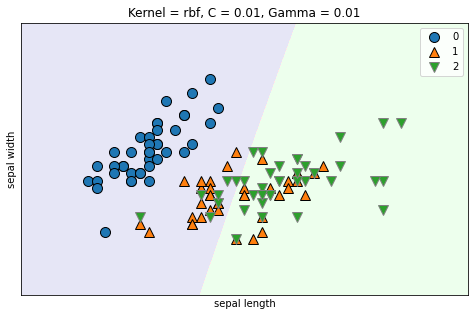

학습용 데이터로 측정한 정확도 = 0.65
시험용 데이터로 측정한 정확도 = 0.60


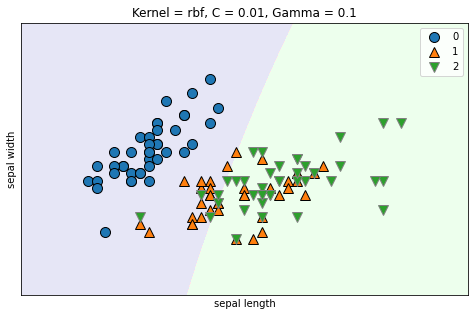

학습용 데이터로 측정한 정확도 = 0.68
시험용 데이터로 측정한 정확도 = 0.60


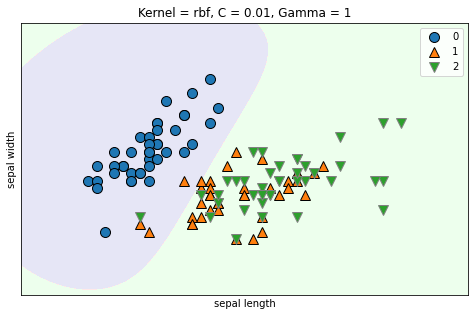

학습용 데이터로 측정한 정확도 = 0.68
시험용 데이터로 측정한 정확도 = 0.60


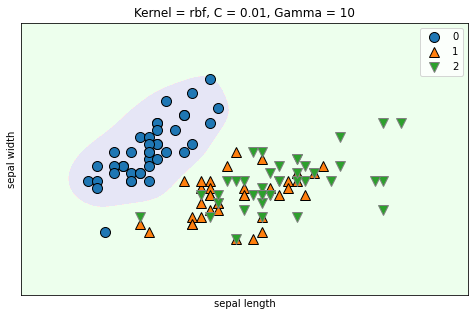

학습용 데이터로 측정한 정확도 = 0.68
시험용 데이터로 측정한 정확도 = 0.57


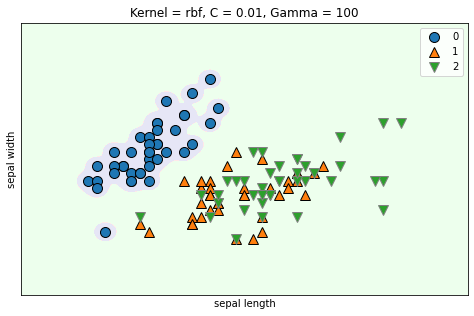

학습용 데이터로 측정한 정확도 = 0.68
시험용 데이터로 측정한 정확도 = 0.57


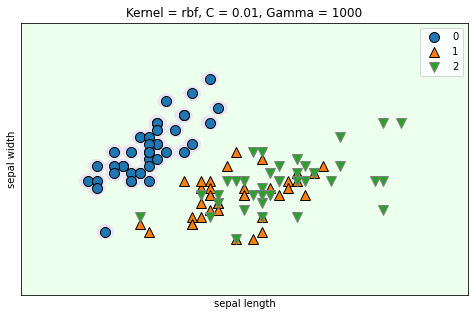

학습용 데이터로 측정한 정확도 = 0.62
시험용 데이터로 측정한 정확도 = 0.60


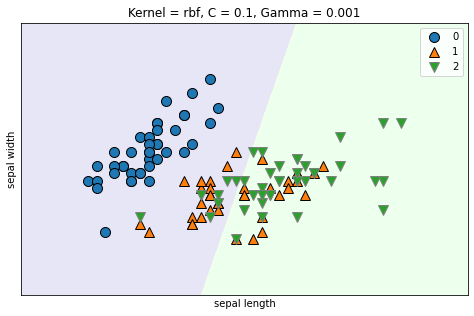

학습용 데이터로 측정한 정확도 = 0.62
시험용 데이터로 측정한 정확도 = 0.60


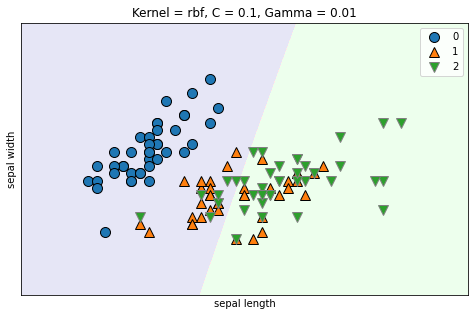

학습용 데이터로 측정한 정확도 = 0.67
시험용 데이터로 측정한 정확도 = 0.60


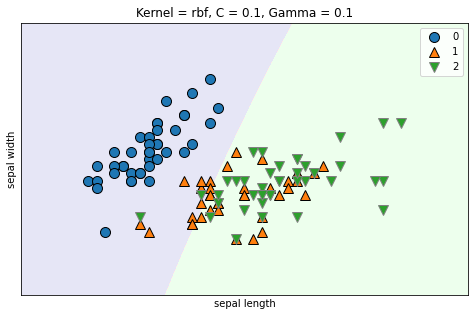

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.83


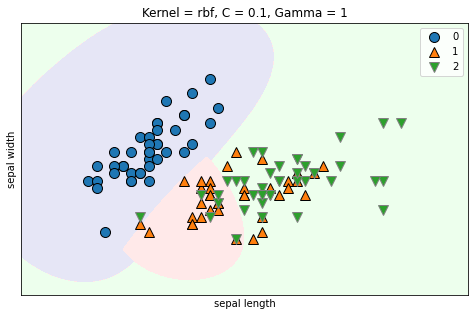

학습용 데이터로 측정한 정확도 = 0.68
시험용 데이터로 측정한 정확도 = 0.60


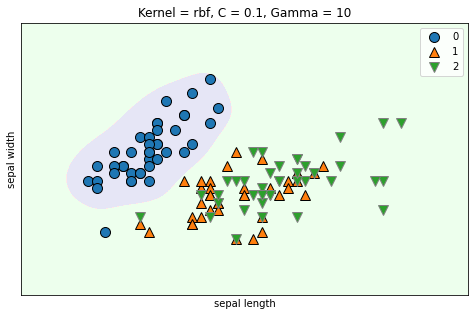

학습용 데이터로 측정한 정확도 = 0.68
시험용 데이터로 측정한 정확도 = 0.57


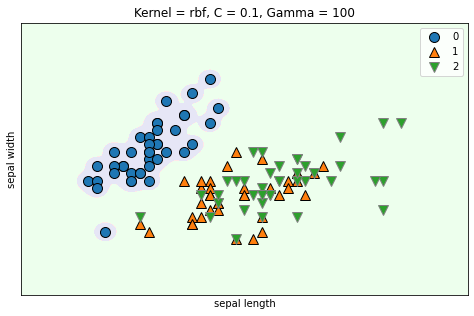

학습용 데이터로 측정한 정확도 = 0.68
시험용 데이터로 측정한 정확도 = 0.57


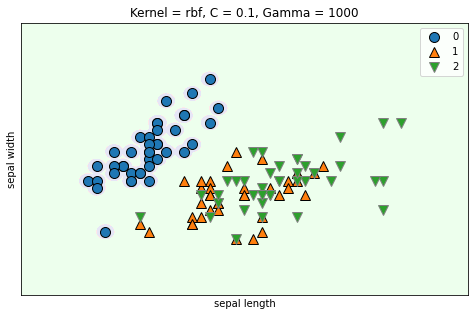

학습용 데이터로 측정한 정확도 = 0.62
시험용 데이터로 측정한 정확도 = 0.60


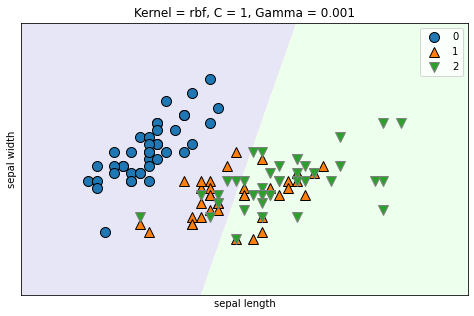

학습용 데이터로 측정한 정확도 = 0.67
시험용 데이터로 측정한 정확도 = 0.60


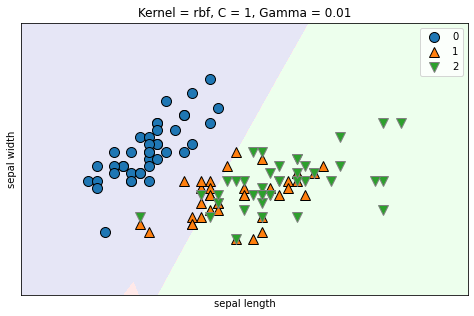

학습용 데이터로 측정한 정확도 = 0.79
시험용 데이터로 측정한 정확도 = 0.97


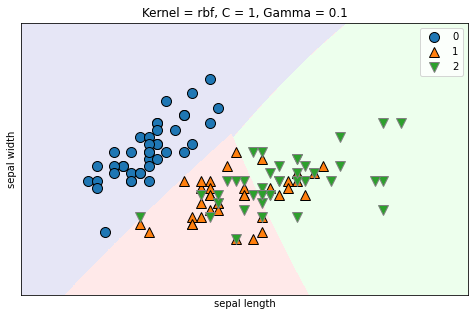

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.90


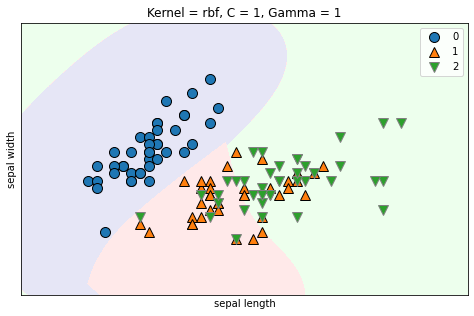

학습용 데이터로 측정한 정확도 = 0.83
시험용 데이터로 측정한 정확도 = 0.80


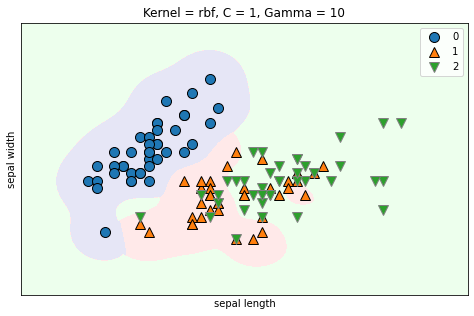

학습용 데이터로 측정한 정확도 = 0.93
시험용 데이터로 측정한 정확도 = 0.67


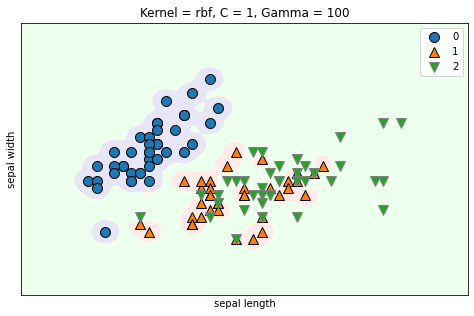

학습용 데이터로 측정한 정확도 = 0.94
시험용 데이터로 측정한 정확도 = 0.43


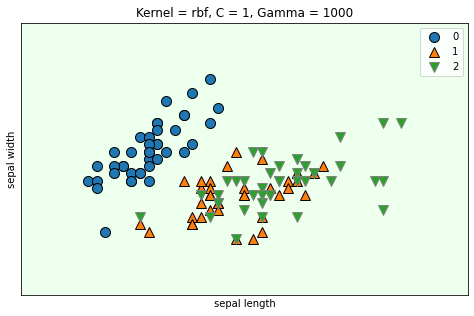

학습용 데이터로 측정한 정확도 = 0.67
시험용 데이터로 측정한 정확도 = 0.60


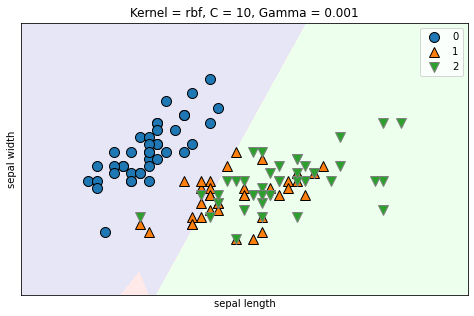

학습용 데이터로 측정한 정확도 = 0.79
시험용 데이터로 측정한 정확도 = 0.97


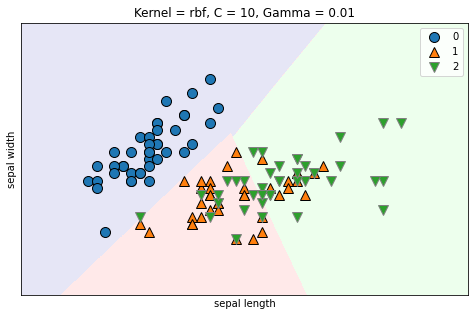

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


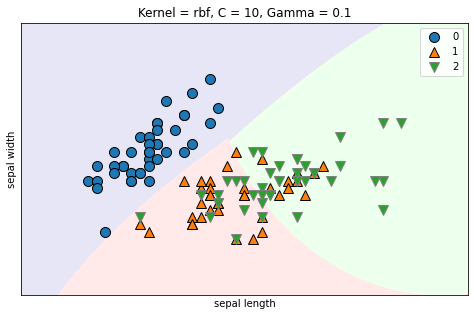

학습용 데이터로 측정한 정확도 = 0.81
시험용 데이터로 측정한 정확도 = 0.83


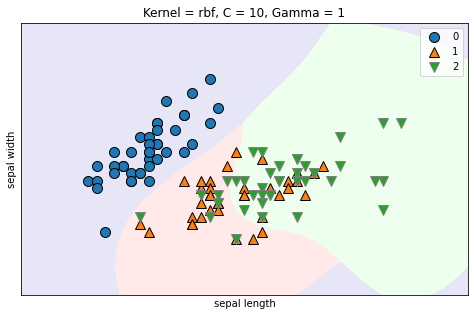

학습용 데이터로 측정한 정확도 = 0.88
시험용 데이터로 측정한 정확도 = 0.80


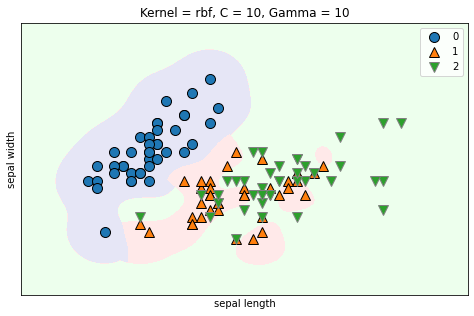

학습용 데이터로 측정한 정확도 = 0.94
시험용 데이터로 측정한 정확도 = 0.67


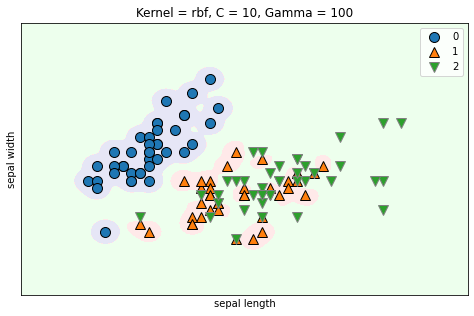

학습용 데이터로 측정한 정확도 = 0.94
시험용 데이터로 측정한 정확도 = 0.43


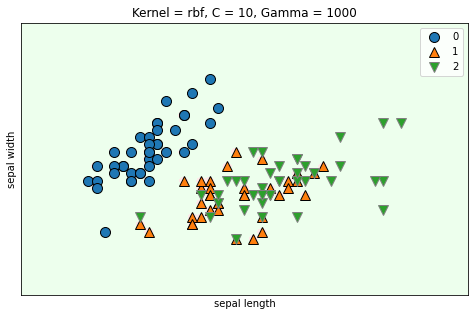

학습용 데이터로 측정한 정확도 = 0.79
시험용 데이터로 측정한 정확도 = 0.97


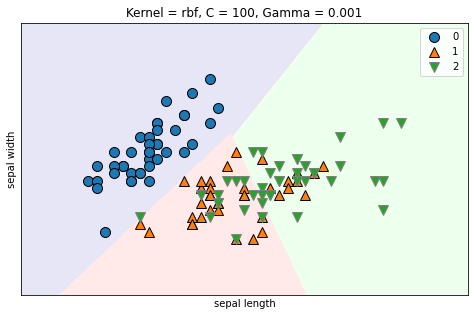

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


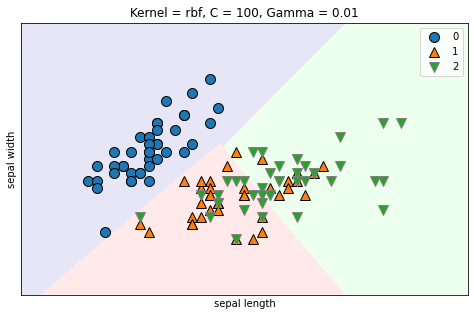

학습용 데이터로 측정한 정확도 = 0.79
시험용 데이터로 측정한 정확도 = 0.97


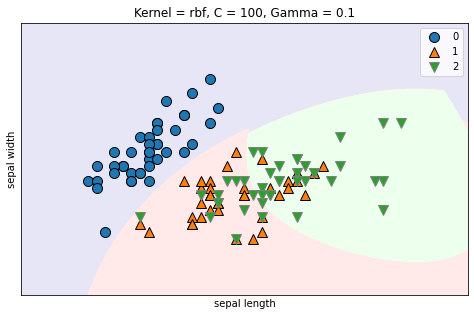

학습용 데이터로 측정한 정확도 = 0.81
시험용 데이터로 측정한 정확도 = 0.83


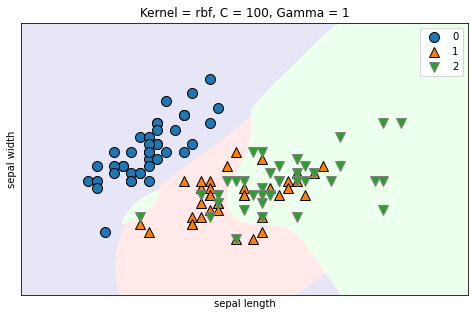

학습용 데이터로 측정한 정확도 = 0.92
시험용 데이터로 측정한 정확도 = 0.80


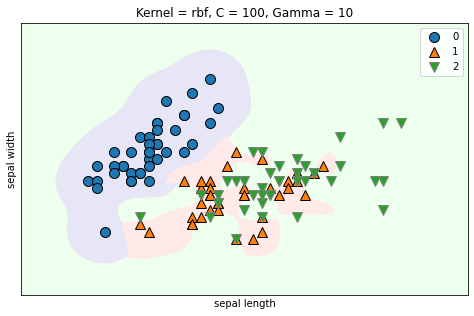

학습용 데이터로 측정한 정확도 = 0.94
시험용 데이터로 측정한 정확도 = 0.67


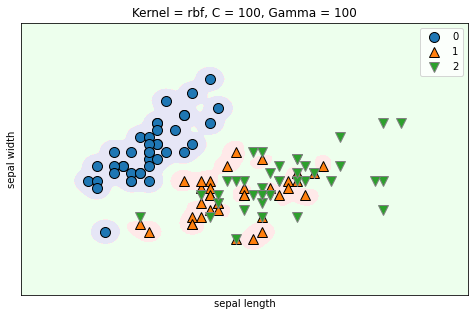

학습용 데이터로 측정한 정확도 = 0.94
시험용 데이터로 측정한 정확도 = 0.43


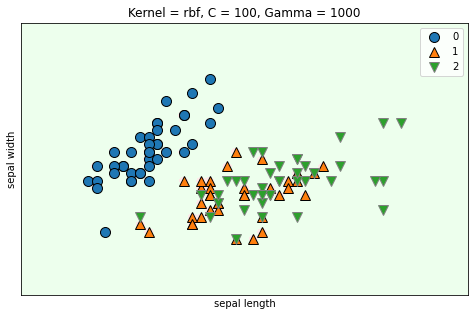

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


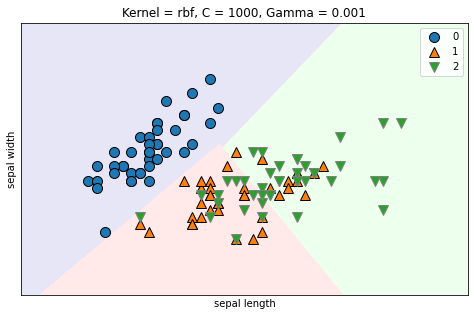

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


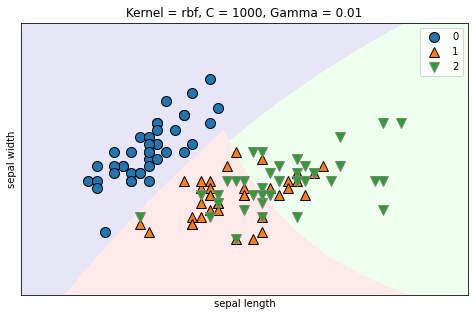

학습용 데이터로 측정한 정확도 = 0.79
시험용 데이터로 측정한 정확도 = 0.90


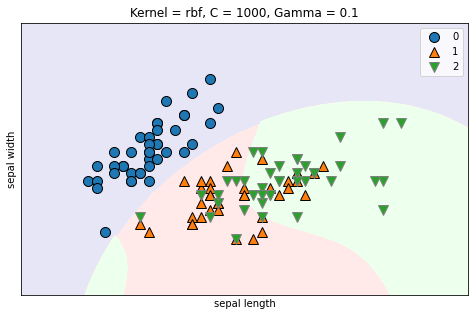

학습용 데이터로 측정한 정확도 = 0.82
시험용 데이터로 측정한 정확도 = 0.77


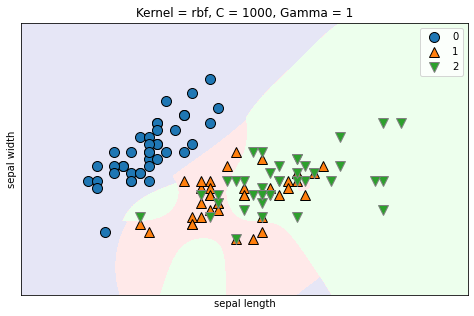

학습용 데이터로 측정한 정확도 = 0.94
시험용 데이터로 측정한 정확도 = 0.67


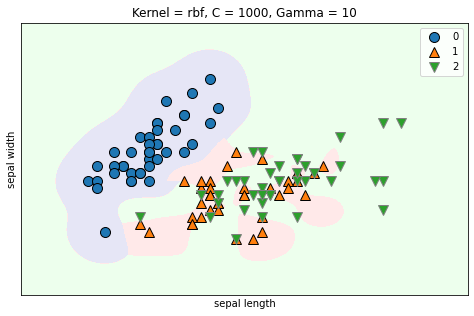

학습용 데이터로 측정한 정확도 = 0.94
시험용 데이터로 측정한 정확도 = 0.67


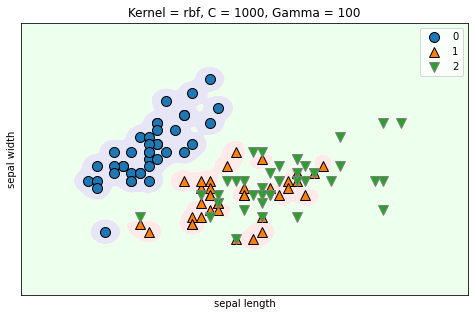

학습용 데이터로 측정한 정확도 = 0.94
시험용 데이터로 측정한 정확도 = 0.43


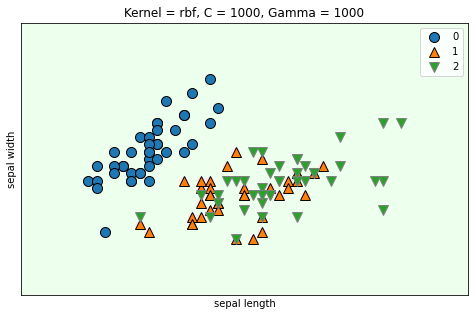

In [6]:
for kernel in kernels :
    for C in C_parameters :
        for Gamma in Gamma_parameters :
            plot_svm(kernel, C, Gamma)

Gamma가 매우 클 때 과적합이 발생하는 것을 확인할 수 있음(rbf의 경우에, linear 경우는 크게 상관없음)

이유는 학습용 데이터로 측정한 정확도는 높지만 시험용 데이터로 측정한 정확도는 낮기 때문에

# GridSearch를 통해서 최적의 하이퍼파라미터 찾기

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# param_grid 규정
param_grid = {'kernel' : ['linear', 'rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# 그리드 서치 분류기 모델 생성
svm = SVC()
clf_grid = GridSearchCV(svm, param_grid, verbose=1)

#  모델 학습
clf_grid.fit(trainX, trainY)

# 최적의 파라미터 출력
print("Best Parameters:\n", clf_grid.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(clf_grid.best_score_))

Fitting 5 folds for each of 98 candidates, totalling 490 fits
Best Parameters:
 {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
GridSearchCV 최고 정확도: 0.7917


# 그리드서치를 통해 추출된 파라미터 확인

학습용 데이터로 측정한 정확도 = 0.78
시험용 데이터로 측정한 정확도 = 0.97


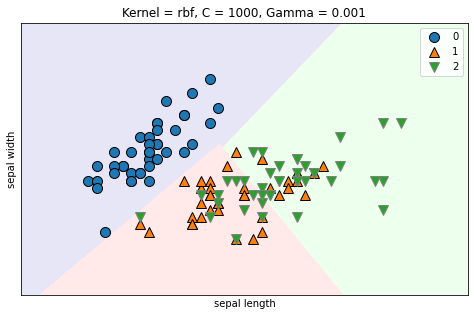

In [9]:
plot_svm('rbf', 1000, 0.001)

그리드 서치를 통해서 추출한 파라미터의 값에 대한 정확도에 대해서 의문점을 가졌지만 cv = 5 즉, 5번의 교차검증을 통해서 가장 최고의 결과를 낸 것이  {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}로 이해하였다. 